final project notebook

Question: What makes someone successful at the Monaco Grand Prix

In [110]:
#Import the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat

In [111]:
#Import the two datasets (race.csv and results.csv)
Races=pd.read_csv("data_raw/races.csv")
Results=pd.read_csv("data_raw/results.csv")
Drivers=pd.read_csv("data_raw/drivers.csv")


In [112]:
#Merge the data in order to have the location included 
MergedData=pd.merge(Results,Races,how="left",on="raceId")

In [113]:
MergedData.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692,1990.251780,8.385991,23.486920
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476,19.345632,4.958210,18.569371
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,1990.000000,8.000000,18.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000


In [114]:
#Merge the data in order to have the name included
FinalMerge=pd.merge(MergedData,Drivers,how="left",on="driverId")

In [115]:
FinalMerge.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692,1990.251780,8.385991,23.486920
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476,19.345632,4.958210,18.569371
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,1990.000000,8.000000,18.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000


In [125]:
#To have the older years compatible to the present remove the grid 
#positions greater than 20 since now there are only 20 grid position
FinalMerge=FinalMerge.sort_values(by=["surname","year"],
                                  ascending=True)


FinalMerge=FinalMerge.query("grid > 0 & grid <=20")


In [126]:
MonacoMerged=FinalMerge.query("name == 'Monaco Grand Prix'")

In [127]:
Monaco_agg1 = (MonacoMerged
                       .groupby(["surname"])
                       .agg(average_points = ('points','mean'),
                            average_grid=('grid','mean'))
                       .sort_values("average_grid",ascending=False))

display(Monaco_agg1)

,average_points,average_grid
surname,,
Sullivan,2.000000,20.000000
Salazar,0.000000,20.000000
Pollet,0.000000,20.000000
Beuttler,0.000000,20.000000
Bernoldi,0.000000,20.000000
...,...,...
González,0.000000,3.000000
Moss,3.571429,2.714286
Castellotti,2.500000,2.666667


Text(0.5, 1.0, 'Average Amount of Points Per Average Grid Position')

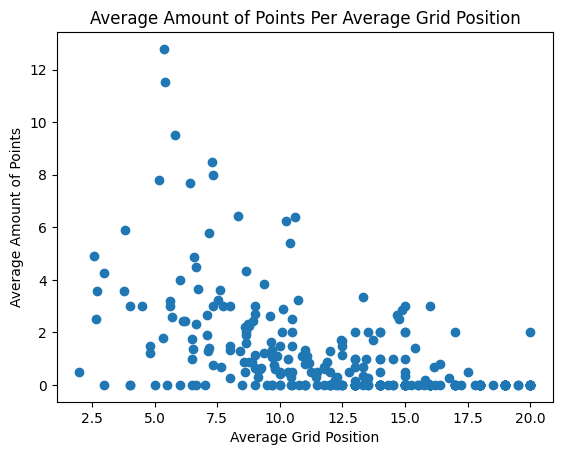

In [157]:
mat.scatter(x="average_grid",y="average_points",data=Monaco_agg1)
mat.xlabel("Average Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Average Grid Position")



In [129]:
Monaco_agg2 = (MonacoMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean'))
                       .sort_values("average_points",ascending=False))


display(Monaco_agg2)

,average_points
grid,
1,7.166667
2,5.970588
3,5.441176
4,4.080882
5,3.608696
6,2.159420
9,2.114286
8,1.895522
7,1.500000


,average_points
grid,
1,7.166667
2,5.970588
3,5.441176
4,4.080882
5,3.608696
6,2.159420
7,1.500000
8,1.895522
9,2.114286


,average_points,Grid_Position
grid,,
1,7.166667,1
2,5.970588,2
3,5.441176,3
4,4.080882,4
5,3.608696,5
6,2.159420,6
7,1.500000,7
8,1.895522,8
9,2.114286,9


([<matplotlib.axis.XTick at 0x20199911550>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

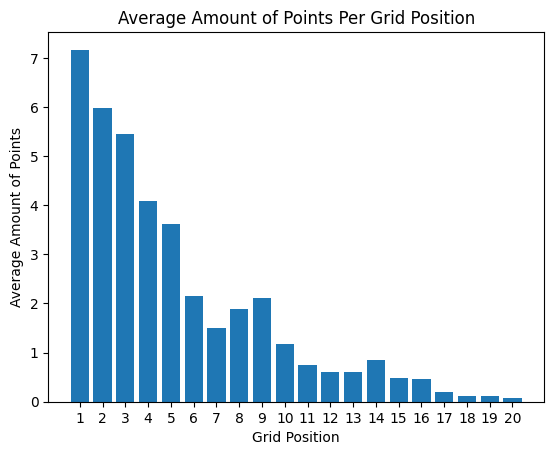

In [154]:
MonacoTest = (MonacoMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(MonacoTest)
numberlist=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
MonacoTest["Grid_Position"]=numberlist
display(MonacoTest)

mat.bar(x="Grid_Position",height="average_points",data=MonacoTest)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position")
mat.xticks(numberlist)



,average_points
grid,
1,6.300000
2,5.324324
3,5.589041
4,3.837838
5,3.253425
6,3.283784
7,2.171053
8,2.081081
9,1.527778


,average_points,Grid_Position
grid,,
1,6.300000,1
2,5.324324,2
3,5.589041,3
4,3.837838,4
5,3.253425,5
6,3.283784,6
7,2.171053,7
8,2.081081,8
9,1.527778,9


([<matplotlib.axis.XTick at 0x201984e3f50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

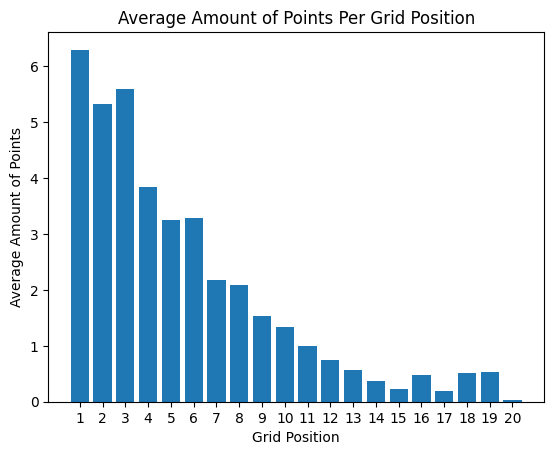

In [153]:
ItalianMerged=FinalMerge.query("name == 'Italian Grand Prix'")

ItalianTest = (ItalianMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(ItalianTest)

ItalianTest["Grid_Position"]=numberlist
display(ItalianTest)

mat.bar(x="Grid_Position",height="average_points",data=ItalianTest)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position")
mat.xticks(numberlist)



,average_points
grid,
1,6.428571
2,5.129032
3,3.903226
4,3.460317
5,2.419355
6,2.171875
7,2.015873
8,0.919355
9,1.096774


,average_points,Grid_Position
grid,,
1,6.428571,1
2,5.129032,2
3,3.903226,3
4,3.460317,4
5,2.419355,5
6,2.171875,6
7,2.015873,7
8,0.919355,8
9,1.096774,9


([<matplotlib.axis.XTick at 0x20195ceb750>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

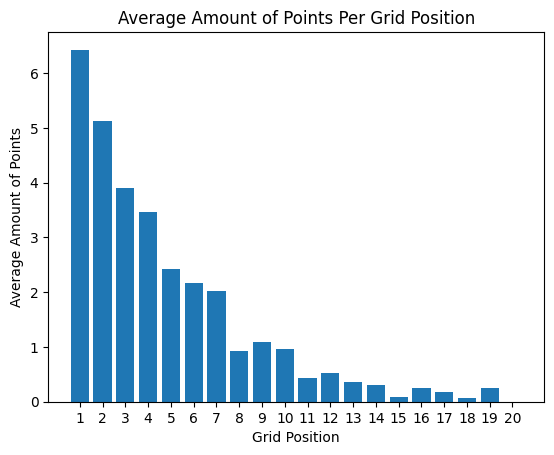

In [152]:
FrenchMerged=FinalMerge.query("name == 'French Grand Prix'")

FrenchTest = (FrenchMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(FrenchTest)

FrenchTest["Grid_Position"]=numberlist
display(FrenchTest)

mat.bar(x="Grid_Position",height="average_points",data=FrenchTest)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position")
mat.xticks(numberlist)



,average_points
grid,
1,8.201900
2,6.811403
3,5.563622
4,4.569253
5,3.589469
6,3.194059
7,2.469638
8,1.943406
9,1.704232


,average_points,Grid_Position
grid,,
1,8.201900,1
2,6.811403,2
3,5.563622,3
4,4.569253,4
5,3.589469,5
6,3.194059,6
7,2.469638,7
8,1.943406,8
9,1.704232,9


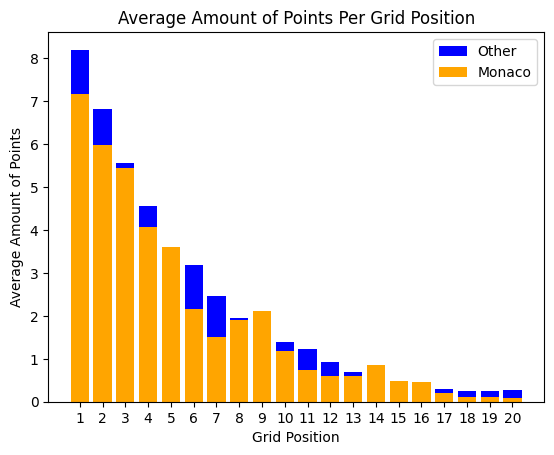

In [151]:
#Make a subset with all of the other grand prix
OtherMerged=FinalMerge.query("name != 'Monaco Grand Prix'")

OtherTest = (OtherMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(OtherTest)

OtherTest["Grid_Position"]=numberlist
display(OtherTest)

mat.bar(x="Grid_Position",height="average_points",data=OtherTest,color=['blue'])
mat.bar(x="Grid_Position",height="average_points",data=MonacoTest,color=['orange'])
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position")
mat.legend(["Other","Monaco"])
mat.xticks(numberlist)

mat.show()


In the graph above one can see that in the Monaco Grand Prix
compared to all other Grand Prix, better grid position doesn't
lead to a better chance of getting more points. This is contrary
to popular belief which states that a better grid position guarantees
more points almost exclusively for Monaco becuase of its tight twist and turns.